# Tutorial on the basics of Machine Learning

### Tutor: Julio C. da Silva (Néel Institute CNRS, Grenoble, France) /  email: julio-cesar.da-silva@neel.cnrs.fr
#### Personal webpage: https://sites.google.com/view/jcesardasilva

Disclaimer: This notebook is only educational and should not be used for professional data analysis. Other, more efficient, and complete codes are available for the latter. It is important to mention that the Python codes were inspired by the “Tutorial TensorFlow” provided by TensorFlow Core by TensorFlow authors. Modifications have been made to the original code for educational reasons and Python compatibility. Further information and other tutorials are available at: https://www.tensorflow.org/tutorials

This code run in **Python3** and requires certain python packages, which are: **Numpy, IPython, Matplotlib, Tensorflow, Keras**

If you do not have those packages, I suggest their installation via pip install: 

    pip3 install numpy, ipython, matplotlib, tensorflow, keras

## Conversion Celsius to Fahrenheit with machine learning

You will train your first Machine Learning model! We'll try to keep things simple here and only introduce basic concepts. The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$

Of course, creating a conventional Python function that directly performs this calculation would be simple enough, but that wouldn't be machine learning. Instead, we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).

Then, we will train a model that figures out the above formula through the training process.

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists. Finaly, we will use [Matploblib] (https://matplotlib.org) to vizualize the data. So,`import matplotlib.pyplot plt`

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-10-06 09:13:54.819705: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Set up training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists `celsius_q` and `fahrenheit_a` that we can use to train our model.

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenhet".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenhet
-10.0 degrees Celsius = 14.0 degrees Fahrenhet
0.0 degrees Celsius = 32.0 degrees Fahrenhet
8.0 degrees Celsius = 46.0 degrees Fahrenhet
15.0 degrees Celsius = 59.0 degrees Fahrenhet
22.0 degrees Celsius = 72.0 degrees Fahrenhet
38.0 degrees Celsius = 100.0 degrees Fahrenhet


### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

 - **Labels** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.
 
 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenhet_a` at a specific index, such as `(22,72)`.



## Create the model

Next, we create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer with a single neuron. 

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celcius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the latter would need to match the `input_shape` of the next layer.)


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [4]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".

- **Optimizer function** — A way of adjusting internal values to reduce the loss.


In [5]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is helpful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not essential to know how these specific functions work now.

One part of the Optimizer you may need to consider when building your models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, training the model will take too many iterations. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default) and 0.1

Let's take a look at the parameters of this network:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

Train the model by calling the `fit` method. 

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights"), and outputs values that are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will be far from the correct value. The difference between the actual and desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted. 

The `fit` method controls this cycle of calculating, comparing, and adjusting. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how often this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Finished training the model")

Epoch 1/500
1/1 [==============================] - 0s 443ms/step - loss: 6960.0547
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 6590.6963
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 6233.0659
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 5887.3501
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 5553.7231
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 5232.3354
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 4923.3096
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 4626.7485
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 4342.7241
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 4071.2837
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 3812.4402
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 3566.1797
Epoch 13/500
1/1 [=====

## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts are far from the corresponding value in `fahrenheit_a`. 

By plotting this information, you can see that our model improves very quickly at first and then has a steady, slow improvement until it is very near "perfect" towards the end.

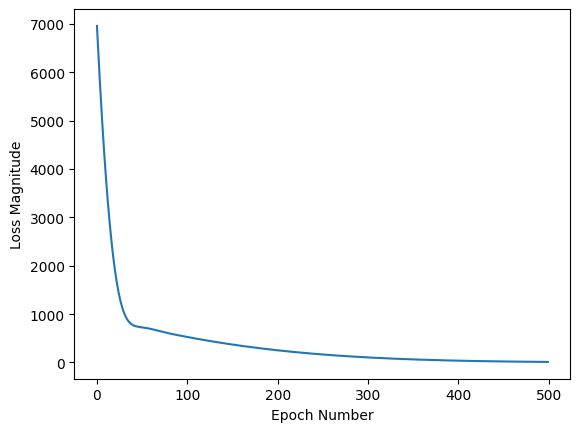

In [8]:
plt.figure()
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show(block=False)

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degree. 

So, for example, if the Celsius value is 200, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [9]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 77ms/step
[[211.2856]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)




## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8276759]], dtype=float32), array([28.518005], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is precisely what happened.

With additional neurons, inputs, and outputs, the formula becomes much more complex, but the idea is the same. 

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore, also have more variables?

In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=4)  
l2 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history2 = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Finished training the model")

Epoch 1/500
1/1 [==============================] - 1s 589ms/step - loss: 4149.4463
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2944.8044
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 2162.2961
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 1483.3113
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 971.0339
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 891.3265
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1232.3070
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 1226.8505
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 939.7578
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 730.3489
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 705.6218
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 777.3181
Epoch 13/500
1/1 [===========

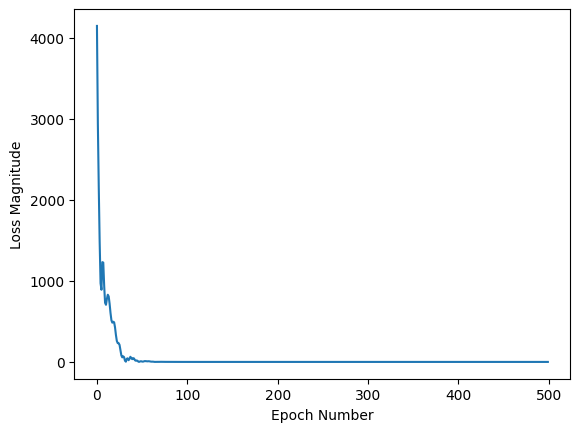

In [12]:
plt.figure()
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history2.history['loss'])
plt.show(block=False)

In [13]:
prediction = model.predict([100.0])
print("\nModel predicts that 100 degrees Celsius is: {:0.2f} degrees Fahrenheit".format(prediction[0][0]))
print("\n############### l0 variables ###############")
print("These are the l0 variables: {}".format(l0.get_weights()))
print("\n############### l1 variables ###############")
print("These are the l1 variables: {}".format(l1.get_weights()))
print("\n############### l2 variables ###############")
print("These are the l2 variables: {}".format(l2.get_weights()))

1/1 [==============================] - 0s 73ms/step

Model predicts that 100 degrees Celsius is: 211.75 degrees Fahrenheit

############### l0 variables ###############
These are the l0 variables: [array([[ 0.04422981,  0.7276102 ,  0.09864152, -0.14871104]],
      dtype=float32), array([ 2.6057565,  3.4534748, -1.7033378,  1.2698362], dtype=float32)]

############### l1 variables ###############
These are the l1 variables: [array([[ 0.6916288 ,  0.6594167 , -0.8144442 ,  0.07145558],
       [ 0.8381755 , -0.09995978, -0.97510517,  1.1218672 ],
       [-1.0446848 , -0.18948548,  0.12262312,  0.26327875],
       [ 0.29554716, -0.6254189 , -0.37751046,  0.24403304]],
      dtype=float32), array([ 3.200018 , -2.145687 , -3.3190749,  1.3767556], dtype=float32)]

############### l2 variables ###############
These are the l2 variables: [array([[ 1.3099005],
       [-0.4022363],
       [-1.4852176],
       [ 0.195307 ]], dtype=float32), array([3.1454492], dtype=float32)]


As you can see, this model can also predict the corresponding Fahrenheit value well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 8         
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
